In [90]:
import numpy as np
import networkx as nx

from itertools import product
from random import choice, shuffle
from operator import itemgetter

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [47]:
n_trees = 10
n_types = 8

def initialise(n_trees: int, n_types: int) -> list:
    cards = list(product(range(n_trees), range(n_types)))
    shuffle(cards)
    return cards

cards = initialise(n_trees, n_types)

In [24]:
G = nx.Graph()
x = cards.pop()
y = cards.pop()
G.add_edge(x, y)
print(G.nodes)
print(type(G.nodes))
choice(list(G.nodes))

[(1, 7), (4, 4)]
<class 'networkx.classes.reportviews.NodeView'>


(4, 4)

In [25]:
for i in range(5):
    x = choice(list(G.nodes))
    y = cards.pop()
    G.add_edge(x, y)

c:\users\lachlan\appdata\local\programs\python\python37\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


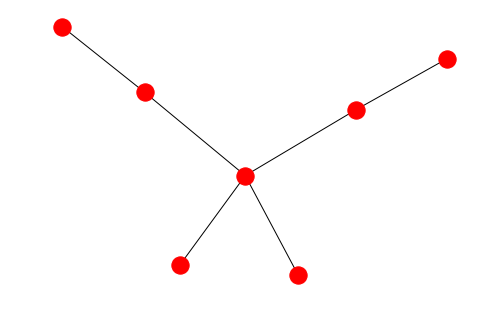

In [29]:
nx.draw(G)

In [82]:
cards = initialise(n_trees, n_types)

G = nx.DiGraph()
x = cards.pop()
y = cards.pop()
G.add_edge(x, y)

for i in range(10):
    x = choice(list(G.nodes))
    y = cards.pop()
    x_type, x_value = x
    y_type, y_value = y
    G.add_node(x, type=x_type, value=x_value)
    G.add_node(x, type=y_type, value=y_value)
    G.add_edge(x, y, diff=x_value - y_value)
    

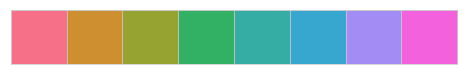

In [50]:
sns.palplot(sns.color_palette("husl", 8))

In [149]:
G.nodes()

NodeView(((0, 0), (0, 1), (1, 0), (-1, 1), (-2, 1), (2, 0), (2, 1), (1, 1), (-3, 1), (-1, 0), (-3, 2)))

{(0, 0): array([ 0.15884876, -0.25287476]), (0, 1): array([-0.38660015, -0.17624488]), (1, 0): array([-0.06378499, -0.33111317]), (-1, 1): array([-0.21959636, -0.0105803 ]), (-2, 1): array([-0.02641226,  0.16689916]), (2, 0): array([-0.53641063,  0.35620893]), (2, 1): array([-0.61379782,  0.60933822]), (1, 1): array([ 0.41778766, -1.        ]), (-3, 1): array([0.16801865, 0.36295685]), (-1, 0): array([ 0.74402837, -0.27713711]), (-3, 2): array([0.35791877, 0.55254707])}


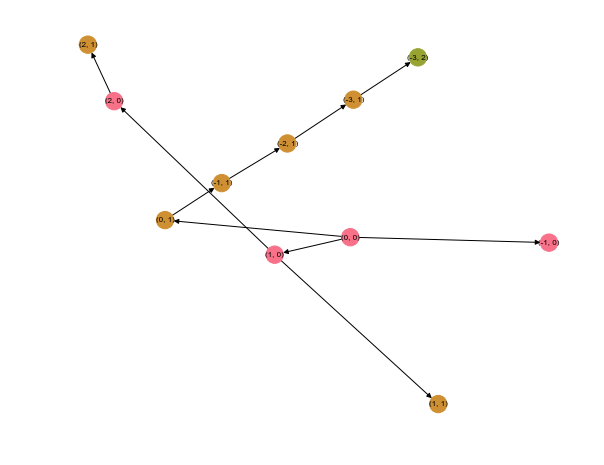

In [147]:
cmap = sns.color_palette("husl", n_types)


fig, ax = plt.subplots(figsize=(10, 8))

pos = nx.spring_layout(G)
print(pos)

nx.draw(G, pos, node_color=[cmap[t] for _, t in G.nodes])

nx.draw_networkx_labels(G, pos, font_size=8)

nx.draw_networkx_edge_labels(
    G, pos, edge_labels=nx.get_edge_attributes(G, 'diff'),
)

None

In [106]:
print(G.nodes)
max(G.nodes, key=itemgetter(1))
max(G.nodes, key=itemgetter(1))
np.random.rand()

[(8, 5), (9, 4), (1, 2), (1, 7), (4, 3), (7, 6), (7, 0), (9, 3), (7, 4), (2, 5), (4, 5), (1, 1), (0, 6), (7, 3), (0, 3), (8, 3), (3, 2), (5, 0), (0, 1), (9, 7), (4, 1), (9, 0)]


0.41692562181143844

In [125]:
positions = {(0, 0): 0}

for i in range(5):  
    while True:
        a = choice(list(positions.keys()))
        z = list(a)
        
        r = np.random.randint(0, 3)
        if r == 0:
            z[0] += 1
        elif r == 1:
            z[0] -= 1
        elif r == 2:
            z[1] += 1
        else:
            z[1] -= 1
        
        z = tuple(z)
        
        if z in positions:
            print(positions.keys())
            print(f"anchor position: {a}; failed placement: {z}\n")
        
        else:
            positions[z] = i
            print(f"anchor position: {a}; accepted placement: {z}\n")
            break
            
positions

anchor position: (0, 0); accepted placement: (-1, 0)

anchor position: (0, 0); accepted placement: (0, 1)

dict_keys([(0, 0), (-1, 0), (0, 1)])
anchor position: (0, 0); failed placement: (-1, 0)

anchor position: (0, 1); accepted placement: (-1, 1)

anchor position: (-1, 0); accepted placement: (-2, 0)

anchor position: (0, 1); accepted placement: (1, 1)



{(0, 0): 0, (-1, 0): 0, (0, 1): 1, (-1, 1): 2, (-2, 0): 3, (1, 1): 4}

In [139]:
def place_card(positions, value):
    while True:
        a = choice(list(positions.keys()))
        z = list(a)
        
        r = np.random.randint(0, 3)
        if r == 0:
            z[0] += 1
        elif r == 1:
            z[0] -= 1
        elif r == 2:
            z[1] += 1
        else:
            z[1] -= 1
        
        z = tuple(z)
        
        if z in positions:
            print(positions.keys())
            print(f"anchor position: {a}; failed placement: {z}\n")
        
        else:
            positions[z] = value
            print(f"anchor position: {a}; accepted placement: {z}\n")
            break
    
    return positions

anchor position: (0, 0); accepted placement: (-1, 0)

dict_keys([(0, 0), (-1, 0)])
anchor position: (0, 0); failed placement: (-1, 0)

anchor position: (0, 0); accepted placement: (0, 1)

anchor position: (-1, 0); accepted placement: (-1, 1)

anchor position: (0, 1); accepted placement: (0, 2)

dict_keys([(0, 0), (-1, 0), (0, 1), (-1, 1), (0, 2)])
anchor position: (0, 1); failed placement: (-1, 1)

dict_keys([(0, 0), (-1, 0), (0, 1), (-1, 1), (0, 2)])
anchor position: (-1, 0); failed placement: (-1, 1)

dict_keys([(0, 0), (-1, 0), (0, 1), (-1, 1), (0, 2)])
anchor position: (0, 0); failed placement: (0, 1)

anchor position: (-1, 0); accepted placement: (-2, 0)

dict_keys([(0, 0), (-1, 0), (0, 1), (-1, 1), (0, 2), (-2, 0)])
anchor position: (0, 0); failed placement: (-1, 0)

anchor position: (0, 1); accepted placement: (1, 1)

anchor position: (0, 0); accepted placement: (1, 0)

anchor position: (-2, 0); accepted placement: (-3, 0)

anchor position: (-2, 0); accepted placement: (-2, 1)



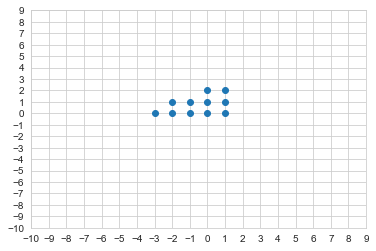

In [140]:
cards = initialise(n_trees, n_types)

x = cards.pop()
positions = {(0, 0): x}

for i in range(10):
    x = cards.pop()
    positions = place_card(positions, x)
    

fig, ax = plt.subplots()
ax.plot(*zip(*positions.keys()), 'o')
ax.set_xticks(np.arange(-10, 10, 1))
ax.set_yticks(np.arange(-10, 10, 1))
plt.grid(True)
plt.show()

In [187]:
def place_card_g(positions, value, G, verbose=False):
    while True:
        a = choice(list(positions.keys()))
        z = list(a)
        
        r = np.random.randint(0, 3)
        if r == 0:
            z[0] += 1
        elif r == 1:
            z[0] -= 1
        elif r == 2:
            z[1] += 1
        else:
            z[1] -= 1
        
        z = tuple(z)
        
        if z in positions:
            if verbose:
                print(positions.keys())
                print(f"anchor position: {a}; failed placement: {z}\n")
        
        else:
            positions[z] = value
            
            av, zv = positions[a][0], positions[z][0]
            
            if av - zv > 0:
                G.add_edge(positions[a], positions[z], diff=av - zv)
            
            if zv - av > 0:
                G.add_edge(positions[z], positions[a], diff=zv - av)
            
            translations = [(-1, 0), (1, 0), (0, 1), (0, -1)]
            for t in translations:
                q = tuple(map(sum, zip(z, t)))
                
                if q in positions:
                    qv = positions[q][0]
                    if qv - zv > 0: 
                        G.add_edge(positions[q], positions[z], diff=qv - zv)
                        
                    if zv - qv > 0:
                        G.add_edge(positions[z], positions[q], diff=zv - qv)
            
            if verbose:
                print(f"anchor position: {a}; accepted placement: {z}\n")
                
            break
    
    return positions, G

anchor position: (0, 0); accepted placement: (1, 0)

anchor position: (0, 0); accepted placement: (-1, 0)

dict_keys([(0, 0), (1, 0), (-1, 0)])
anchor position: (0, 0); failed placement: (-1, 0)

dict_keys([(0, 0), (1, 0), (-1, 0)])
anchor position: (1, 0); failed placement: (0, 0)

dict_keys([(0, 0), (1, 0), (-1, 0)])
anchor position: (0, 0); failed placement: (1, 0)

anchor position: (1, 0); accepted placement: (1, 1)

anchor position: (1, 1); accepted placement: (1, 2)

dict_keys([(0, 0), (1, 0), (-1, 0), (1, 1), (1, 2)])
anchor position: (-1, 0); failed placement: (0, 0)

dict_keys([(0, 0), (1, 0), (-1, 0), (1, 1), (1, 2)])
anchor position: (-1, 0); failed placement: (0, 0)

anchor position: (1, 2); accepted placement: (2, 2)

anchor position: (1, 2); accepted placement: (1, 3)

anchor position: (1, 2); accepted placement: (0, 2)

dict_keys([(0, 0), (1, 0), (-1, 0), (1, 1), (1, 2), (2, 2), (1, 3), (0, 2)])
anchor position: (1, 0); failed placement: (1, 1)

dict_keys([(0, 0), (1, 0)

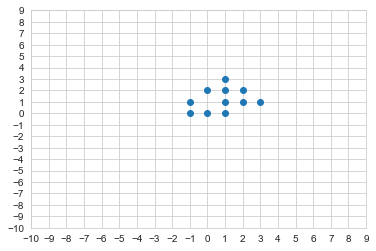

In [152]:
cards = initialise(n_trees, n_types)

G = nx.DiGraph()

x = cards.pop()
positions = {(0, 0): x}

for i in range(10):
    x = cards.pop()
    positions, G = place_card_g(positions, x, G)
    

fig, ax = plt.subplots()
ax.plot(*zip(*positions.keys()), 'o')
ax.set_xticks(np.arange(-10, 10, 1))
ax.set_yticks(np.arange(-10, 10, 1))
plt.grid(True)
plt.show()

{(3, 3): (0, 0), (1, 5): (1, 0), (1, 1): (-1, 0), (6, 3): (1, 1), (7, 1): (1, 2), (9, 6): (2, 2), (1, 4): (1, 3), (6, 0): (0, 2), (4, 1): (2, 1), (0, 3): (3, 1), (4, 2): (-1, 1)}


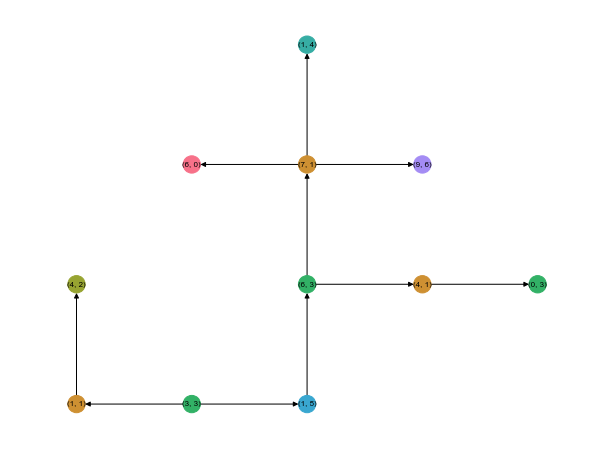

In [153]:
cmap = sns.color_palette("husl", n_types)

fig, ax = plt.subplots(figsize=(10, 8))
pos =  {v: k for k, v in positions.items()}
print(pos)

nx.draw(G, pos, node_color=[cmap[t] for _, t in G.nodes])

nx.draw_networkx_labels(G, pos, font_size=8)

nx.draw_networkx_edge_labels(
    G, pos, edge_labels=nx.get_edge_attributes(G, 'diff'),
)

None

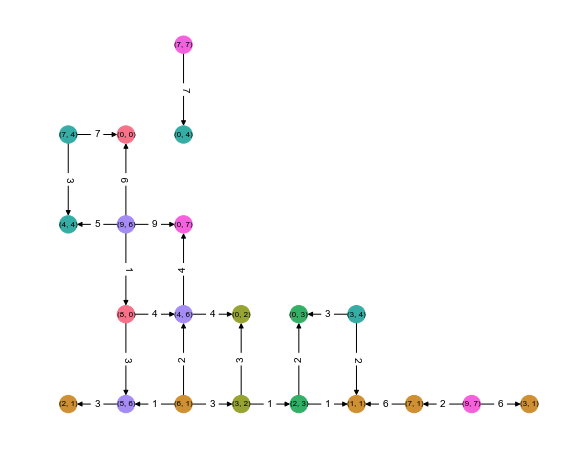

In [188]:
cards = initialise(n_trees, n_types)

G = nx.DiGraph()

x = cards.pop()
positions = {(0, 0): x}

for i in range(20):
    x = cards.pop()
    positions, G = place_card_g(positions, x, G)
    

    

cmap = sns.color_palette("husl", n_types)

fig, ax = plt.subplots(figsize=(10, 8))
pos =  {v: k for k, v in positions.items()}

nx.draw(G, pos, node_color=[cmap[t] for _, t in G.nodes])

nx.draw_networkx_labels(G, pos, font_size=8)

nx.draw_networkx_edge_labels(
    G, pos, edge_labels=nx.get_edge_attributes(G, 'diff'),
)

None

In [192]:
list(nx.all_simple_paths(G, (0, 2), (3, 2)))

[]

In [179]:
nx.get_edge_attributes(G, 'diff')

{((7, 7), (6, 7)): 1,
 ((7, 7), (0, 1)): 7,
 ((7, 7), (9, 6)): -2,
 ((6, 7), (7, 7)): -1,
 ((6, 7), (8, 6)): -2,
 ((0, 1), (7, 7)): -7,
 ((0, 1), (9, 3)): -9,
 ((0, 1), (0, 4)): 0,
 ((8, 6), (6, 7)): 2,
 ((8, 6), (1, 0)): 7,
 ((9, 3), (0, 1)): 9,
 ((9, 3), (7, 3)): 2,
 ((9, 3), (5, 4)): 4,
 ((7, 3), (9, 3)): -2,
 ((7, 3), (8, 0)): -1,
 ((7, 3), (0, 4)): 7,
 ((7, 3), (0, 6)): 7,
 ((5, 4), (9, 3)): -4,
 ((5, 4), (0, 6)): 5,
 ((5, 4), (2, 0)): 3,
 ((8, 0), (7, 3)): 1,
 ((8, 0), (0, 5)): 8,
 ((1, 0), (8, 6)): -7,
 ((1, 0), (8, 7)): -7,
 ((1, 0), (9, 2)): -8,
 ((8, 7), (1, 0)): 7,
 ((8, 7), (0, 7)): 8,
 ((8, 7), (9, 0)): -1,
 ((0, 7), (8, 7)): -8,
 ((0, 4), (0, 1)): 0,
 ((0, 4), (7, 3)): -7,
 ((0, 4), (9, 6)): -9,
 ((0, 4), (0, 5)): 0,
 ((0, 6), (5, 4)): -5,
 ((0, 6), (7, 3)): -7,
 ((0, 6), (5, 6)): -5,
 ((2, 0), (5, 4)): -3,
 ((2, 0), (5, 6)): -3,
 ((9, 6), (7, 7)): 2,
 ((9, 6), (0, 4)): 9,
 ((9, 6), (1, 3)): 8,
 ((1, 3), (9, 6)): -8,
 ((1, 3), (0, 5)): 1,
 ((1, 3), (6, 5)): -5,
 ((9, 0), 

In [186]:
a = (1, 3)
b = (7, 3)

paths = list(nx.all_simple_paths(G, a, b))
edge_diff = nx.get_edge_attributes(G, 'diff')

path_length = {}
for i, path in enumerate(paths):
    length = 0
    for x, y in zip(path[:-1], path[1:]):
        k = (x, y)
        length += edge_diff[k]
        
    path_length[i] = length
    print(f"path {i}: length={length}")
    
path_length

path 0: length=-6
path 1: length=-6
path 2: length=-6
path 3: length=-6
path 4: length=-6
path 5: length=-6
path 6: length=-6
path 7: length=-6
path 8: length=-6
path 9: length=-6
path 10: length=-6
path 11: length=-6
path 12: length=-6
path 13: length=-6
path 14: length=-6
path 15: length=-6
path 16: length=-6
path 17: length=-6


{0: -6,
 1: -6,
 2: -6,
 3: -6,
 4: -6,
 5: -6,
 6: -6,
 7: -6,
 8: -6,
 9: -6,
 10: -6,
 11: -6,
 12: -6,
 13: -6,
 14: -6,
 15: -6,
 16: -6,
 17: -6}

In [210]:
def place_card_g2(positions, value, G, verbose=False):
    while True:
        a = choice(list(positions.keys()))
        z = list(a)
        
        r = np.random.randint(0, 3)
        if r == 0:
            z[0] += 1
        elif r == 1:
            z[0] -= 1
        elif r == 2:
            z[1] += 1
        else:
            z[1] -= 1
        
        z = tuple(z)
        
        if z in positions:
            if verbose:
                print(positions.keys())
                print(f"anchor position: {a}; failed placement: {z}\n")
        
        else:
            positions[z] = value
            
            av, zv = positions[a][0], positions[z][0]
            
            if av - zv > 0:
                G.add_edge(positions[z], positions[a], diff=av - zv)
            
            if zv - av > 0:
                G.add_edge(positions[a], positions[z], diff=zv - av)
            
            for p in positions:
                pv = positions[p][0]
                translations = [(-1, 0), (1, 0), (0, 1), (0, -1)]
                for t in translations:
                    q = tuple(map(sum, zip(p, t)))

                    if q in positions:
                        qv = positions[q][0]
                        if qv - pv > 0: 
                            G.add_edge(positions[p], positions[q], diff=qv - pv)

                        if pv - qv > 0:
                            G.add_edge(positions[q], positions[p], diff=pv - qv)
            
            if verbose:
                print(f"anchor position: {a}; accepted placement: {z}\n")
                
            break
    
    return positions, G

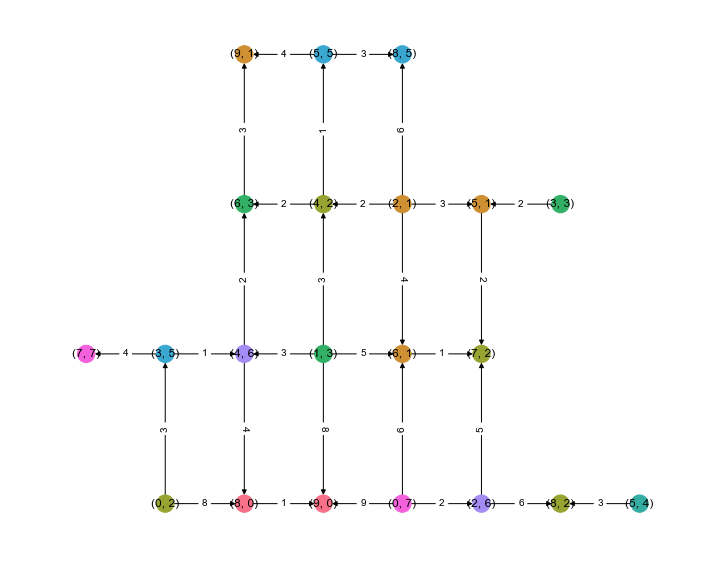

In [216]:
cards = initialise(n_trees, n_types)

G = nx.DiGraph()

x = cards.pop()
positions = {(0, 0): x}

for i in range(20):
    x = cards.pop()
    positions, G = place_card_g2(positions, x, G)
    

    

cmap = sns.color_palette("husl", n_types)

fig, ax = plt.subplots(figsize=(12, 10))
pos =  {v: k for k, v in positions.items()}

nx.draw(G, pos, node_color=[cmap[t] for _, t in G.nodes])

nx.draw_networkx_labels(G, pos, font_size=12)
# nx.draw_networkx_labels(G, pos, labels={(v, t): v for v, t in G.nodes}, font_size=12)

nx.draw_networkx_edge_labels(
    G, pos, edge_labels=nx.get_edge_attributes(G, 'diff'),
)

# plt.legend()
None

In [221]:
a = (1, 4)
b = (6, 4)
list(nx.all_simple_paths(G, a, b))

TypeError: not all arguments converted during string formatting

In [203]:
a = (1, 1)
b = (7, 1)

paths = list(nx.all_simple_paths(G, a, b))
edge_diff = nx.get_edge_attributes(G, 'diff')

path_length = {}
for i, path in enumerate(paths):
    length = 0
    for x, y in zip(path[:-1], path[1:]):
        k = (x, y)
        length += edge_diff[k]
        
    path_length[i] = length
    print(f"path {i}: length={length}")
    
path_length

{}

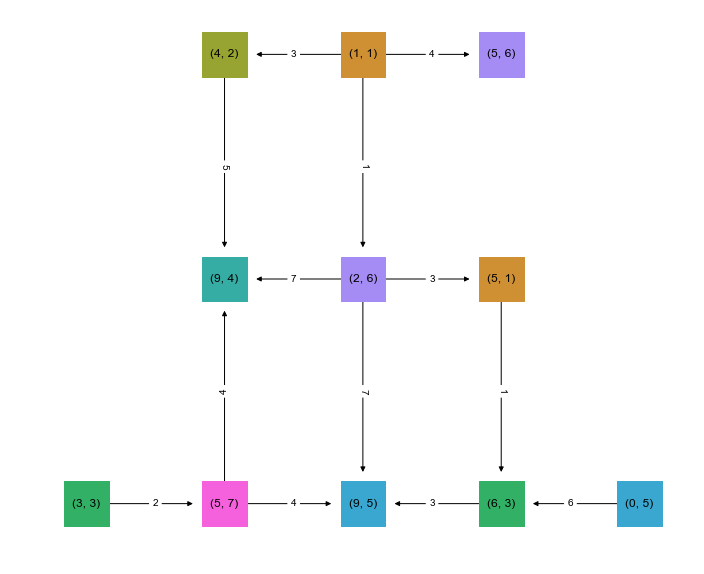

In [224]:
cards = initialise(n_trees, n_types)

G = nx.DiGraph()

x = cards.pop()
positions = {(0, 0): x}

for i in range(10):
    x = cards.pop()
    positions, G = place_card_g2(positions, x, G)
    

    

cmap = sns.color_palette("husl", n_types)

fig, ax = plt.subplots(figsize=(12, 10))
pos =  {v: k for k, v in positions.items()}

nx.draw(
    G, pos, 
    node_shape='s',
    node_size=2000,
    node_color=[cmap[t] for _, t in G.nodes]
)

nx.draw_networkx_labels(G, pos, font_size=12)
# nx.draw_networkx_labels(G, pos, labels={(v, t): v for v, t in G.nodes}, font_size=12)

nx.draw_networkx_edge_labels(
    G, pos, edge_labels=nx.get_edge_attributes(G, 'diff'),
)

# plt.legend()
None

In [225]:
a = (1, 1)
b = (5, 1)
list(nx.all_simple_paths(G, a, b))

[[(1, 1), (2, 6), (5, 1)]]